Esperando a que se ejecuten las estadísticas cada viernes a las 23:59...


C:\Users\Usuario\AppData\Local\Temp\ipykernel_7060\2644294172.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Usuario\AppData\Local\Temp\ipykernel_7060\2644294172.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Gràfiques generades i guardades amb el nom de la data actual a 'images/statistics/comments'.


C:\Users\Usuario\AppData\Local\Temp\ipykernel_7060\420461208.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Usuario\AppData\Local\Temp\ipykernel_7060\420461208.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Gràfiques generades i guardades amb el nom de la data actual a 'images/statistics/comments'.


C:\Users\Usuario\AppData\Local\Temp\ipykernel_7060\2682080611.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Usuario\AppData\Local\Temp\ipykernel_7060\2682080611.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Gràfiques generades i guardades amb el nom de la data actual a 'images/statistics/comments'.


KeyboardInterrupt: 

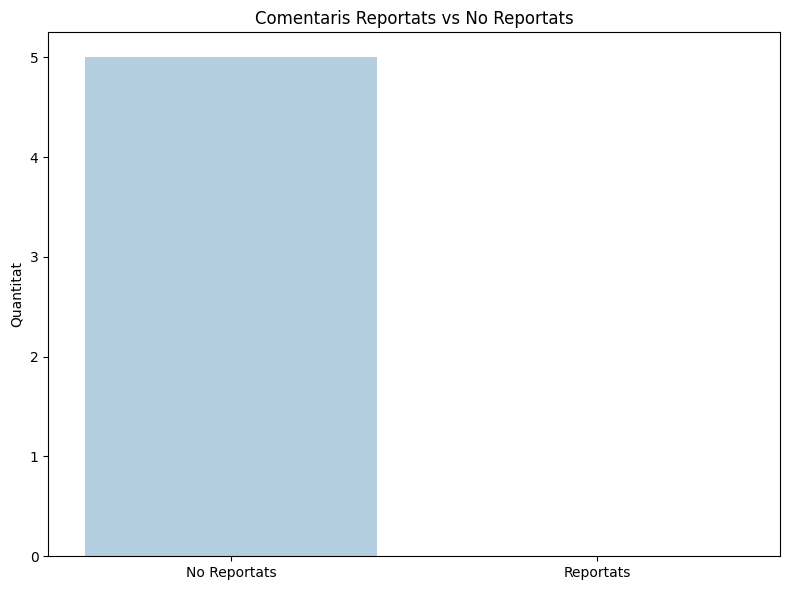

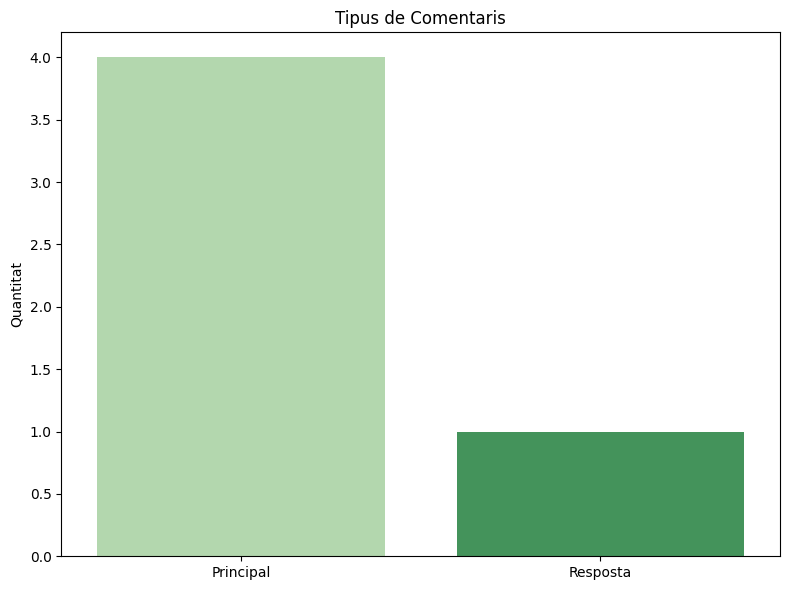

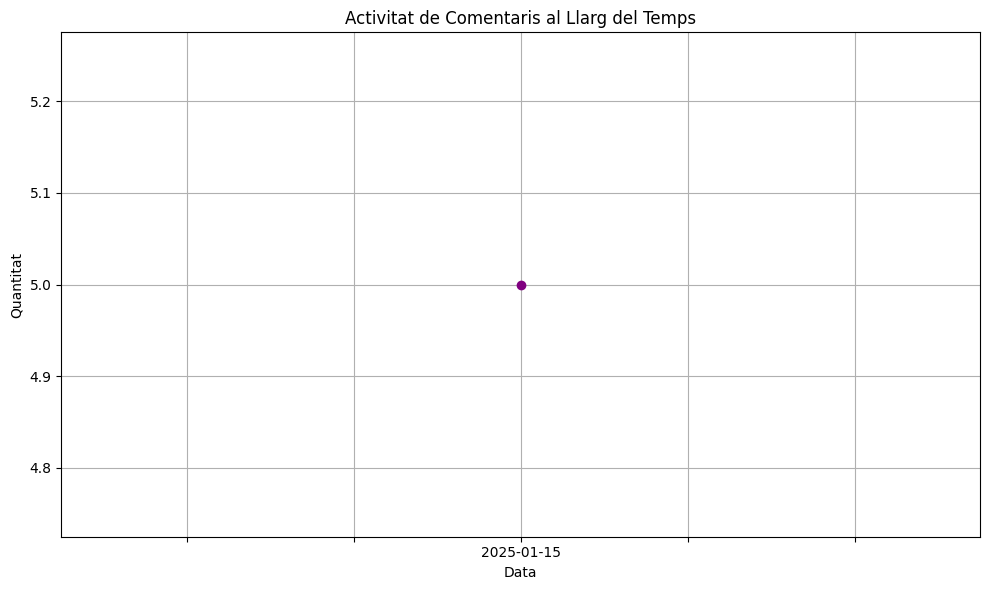

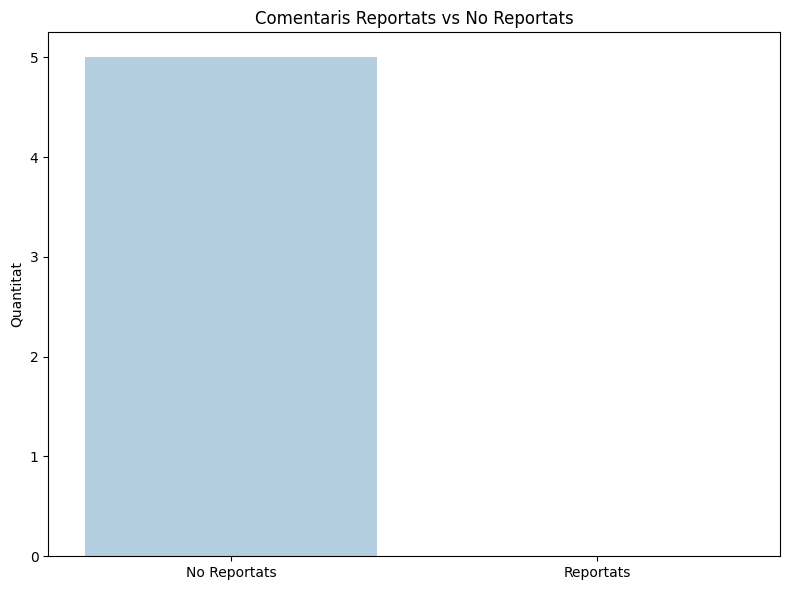

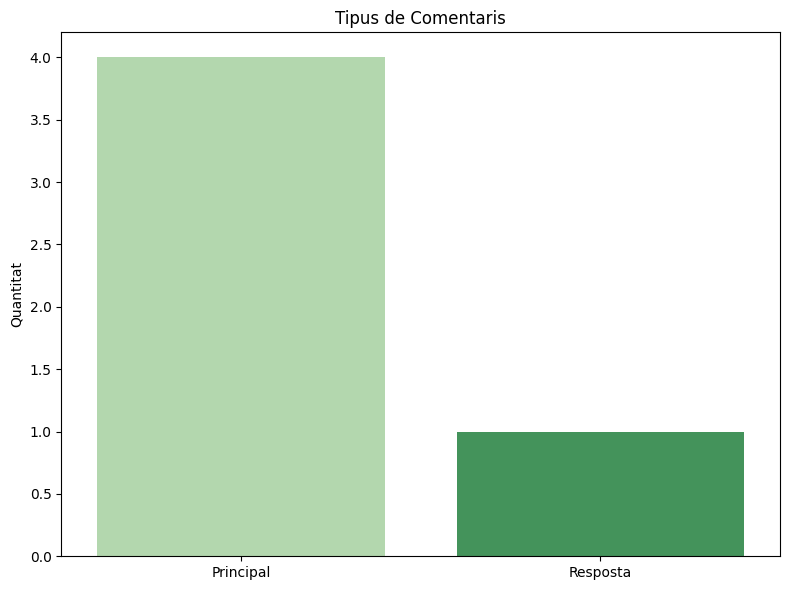

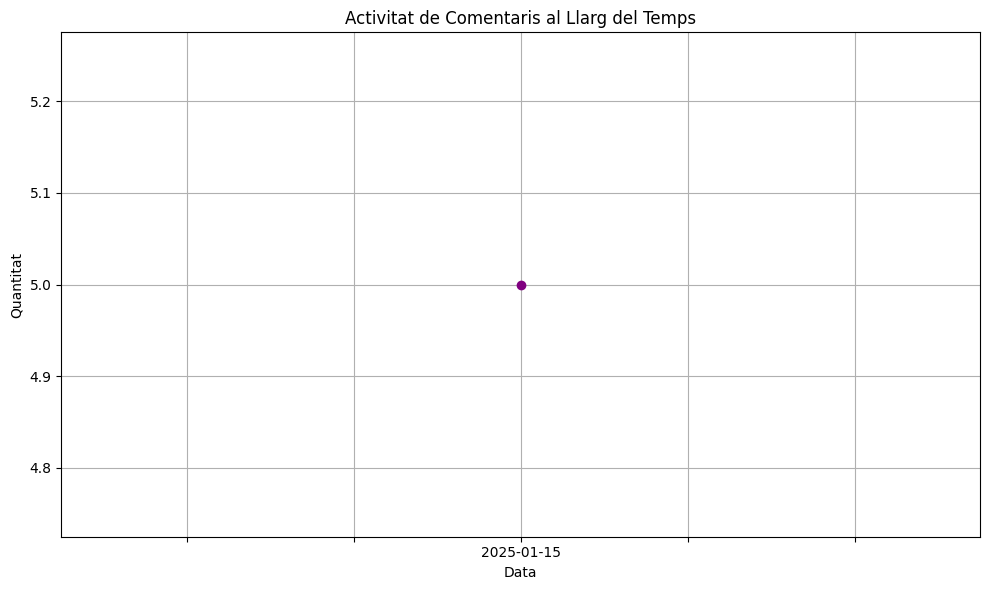

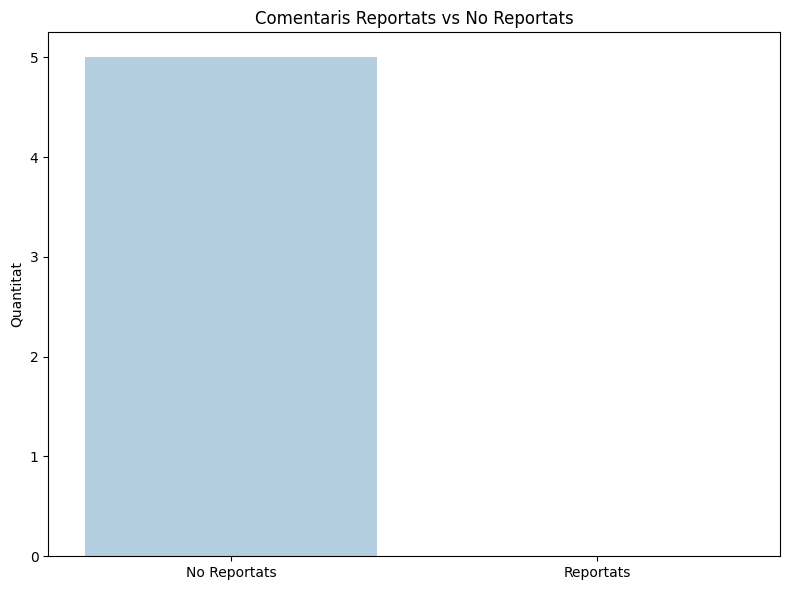

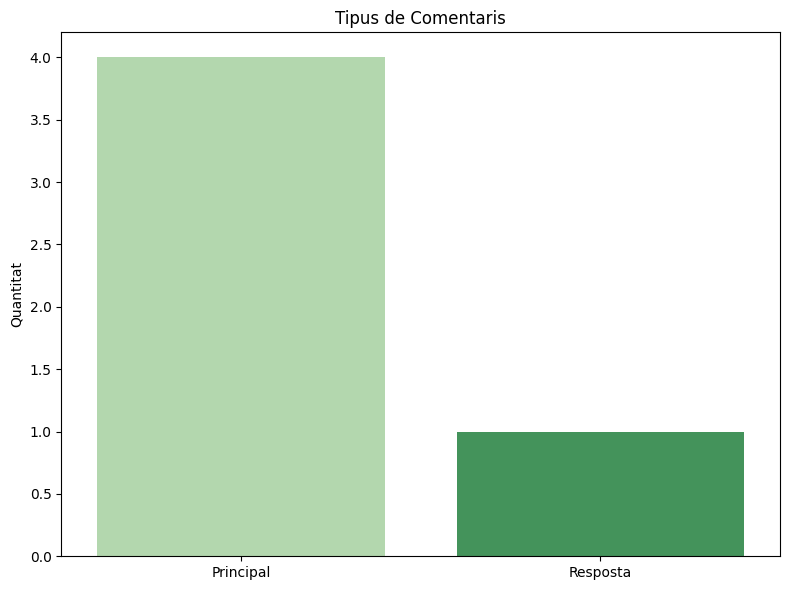

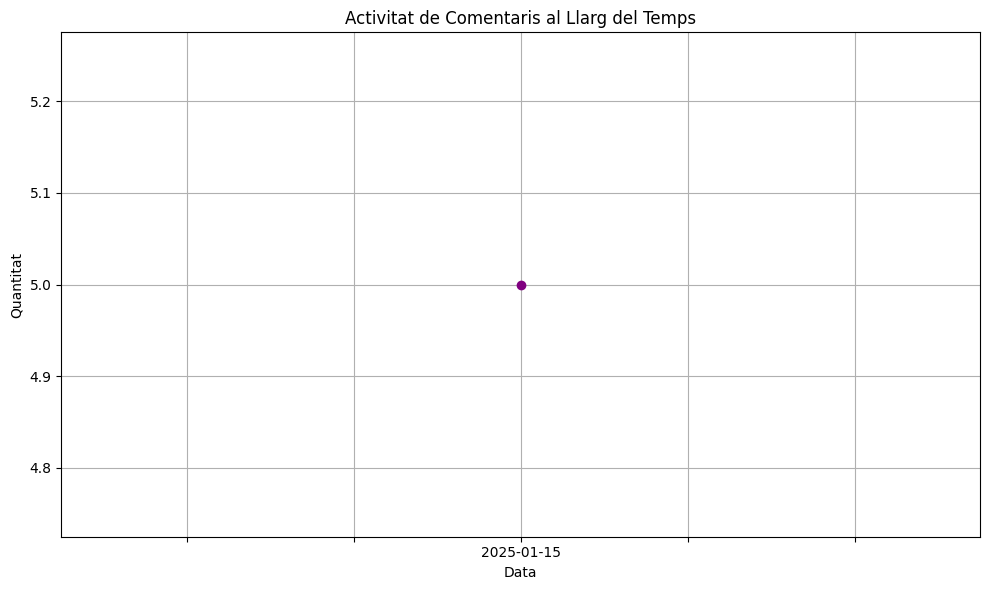

In [3]:
import schedule
import time
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import os
from collections import Counter
from datetime import datetime
import pandas as pd

def generate_comment_statistics():
    # Obtener los datos desde el servidor
    url = "http://localhost:3000/comments"
    response = requests.get(url)

    # Verificar si la solicitud fue exitosa
    if response.status_code != 200:
        raise Exception(f"Error al hacer el fetch: {response.status_code}")

    # Parsear los datos JSON
    comments = response.json()

    # Crear listas con datos relevantes
    categories = [comment['category'] for comment in comments if comment['category'] is not None]
    reported = [comment['reported'] for comment in comments]
    reasons = [comment['reason'] for comment in comments if comment['reason'] is not None]
    comment_types = ['Resposta' if comment['commentReply_id'] else 'Principal' for comment in comments]
    created_dates = [comment['created_at'].split('T')[0] for comment in comments]

    # Crear carpeta para guardar las gráficas
    current_date = datetime.now().strftime("%Y-%m-%d")
    os.makedirs(f"images/statistics/comments/{current_date}", exist_ok=True)

    # Gráfica 1: Distribución de categorías de comentarios
    if categories:
        category_counts = Counter(categories)
        plt.figure(figsize=(8, 6))
        plt.pie(category_counts.values(), labels=category_counts.keys(), autopct='%1.1f%%', colors=sns.color_palette("pastel", len(category_counts)))
        plt.title("Distribució de les Categories de Comentaris")
        plt.axis('equal')
        plt.savefig(f"images/statistics/comments/{current_date}/categories_distribution.png")

    # Gráfica 2: Comentarios reportados vs no reportados
    reported_counts = Counter(reported)
    plt.figure(figsize=(8, 6))
    sns.barplot(
        x=['No Reportats', 'Reportats'],
        y=[reported_counts.get(0, 0), reported_counts.get(1, 0)],
        palette="Blues"
    )
    plt.title("Comentaris Reportats vs No Reportats")
    plt.ylabel("Quantitat")
    plt.tight_layout()
    plt.savefig(f"images/statistics/comments/{current_date}/reported_vs_non_reported.png")

    # Gráfica 3: Principales razones de reporte
    if reasons:
        reason_counts = Counter(reasons)
        plt.figure(figsize=(8, 6))
        sns.barplot(
            x=list(reason_counts.values()),
            y=list(reason_counts.keys()),
            palette="Reds",
            orient="h"
        )
        plt.title("Principals Raons de Report")
        plt.xlabel("Quantitat")
        plt.ylabel("Raó")
        plt.tight_layout()
        plt.savefig(f"images/statistics/comments/{current_date}/report_reasons.png")

    # Gráfica 4: Tipo de comentario (Principal vs Respuesta)
    comment_type_counts = Counter(comment_types)
    plt.figure(figsize=(8, 6))
    sns.barplot(
        x=list(comment_type_counts.keys()),
        y=list(comment_type_counts.values()),
        palette="Greens"
    )
    plt.title("Tipus de Comentaris")
    plt.ylabel("Quantitat")
    plt.tight_layout()
    plt.savefig(f"images/statistics/comments/{current_date}/comment_types.png")

    # Gráfica 5: Actividad de comentarios a lo largo del tiempo
    if created_dates:
        date_counts = pd.Series(created_dates).value_counts().sort_index()
        plt.figure(figsize=(10, 6))
        date_counts.plot(kind='line', marker='o', color='purple')
        plt.title("Activitat de Comentaris al Llarg del Temps")
        plt.xlabel("Data")
        plt.ylabel("Quantitat")
        plt.grid(True)
        plt.tight_layout()
        plt.savefig(f"images/statistics/comments/{current_date}/comments_activity.png")

    print(f"Gràfiques generades i guardades amb el nom de la data actual a 'images/statistics/comments'.")

# Programar la tarea para que se ejecute los viernes a las 23:59
schedule.every().friday.at("23:59").do(generate_comment_statistics)

print("Esperando a que se ejecuten las estadísticas cada viernes a las 23:59...")

# Mantener el programa en ejecución
while True:
    schedule.run_pending()
    time.sleep(1)
